In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import shutil
import os
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler

/home/guilherme-coelho/Documentos/tcc/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

# Define the destination folder path
file_path = os.path.join(os.getcwd(), 'data', 'raw')

# Ensure the destination folder exists
os.makedirs(file_path, exist_ok=True)

# Copy files from the Kaggle dataset path to the local folder
shutil.copytree(path, file_path, dirs_exist_ok=True)

print(f"Dataset downloaded and copied to {file_path}")

Dataset downloaded and copied to /home/guilherme-coelho/Documentos/tcc/notebooks/data/raw


In [ ]:
# # Define the destination folder path
# file_path = '/home/guilherme-coelho/Documentos/tcc/data/raw'

# # Ensure the destination folder exists
# os.makedirs(file_path, exist_ok=True)

# # Copy files from the Kaggle dataset path to the local folder
# shutil.copytree(path, file_path, dirs_exist_ok=True)

# print(f"Dataset copied to {file_path}")

In [3]:
import pandas as pd

# Load the dataset into a DataFrame
dataset_path = os.path.join(file_path, 'fraudTrain.csv') 
df = pd.read_csv(dataset_path)

print(df.head())  # Display the first few rows of the DataFrame

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [4]:
df.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.columns  # Display the column names

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


Valores ausentes no conjunto de treino:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Estatísticas descritivas para colunas numéricas no conjunto de treino:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e

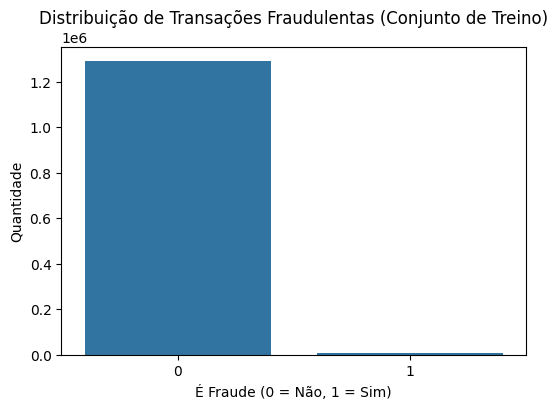

In [6]:
# Verificar valores ausentes no conjunto de treino
print("\nValores ausentes no conjunto de treino:")
print(df.isnull().sum())

# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas no conjunto de treino:")
print(df.describe())

# Distribuição da variável alvo ('is_fraud') no conjunto de treino
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribuição de Transações Fraudulentas (Conjunto de Treino)')
plt.xlabel('É Fraude (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

In [7]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'cc_num', 'trans_date_trans_time', 'first', 'last', 'dob', 'street', 'trans_num', 'unix_time']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

print(df.head())  # Display the first few rows of the updated DataFrame

                             merchant       category     amt gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   
2      Malad City    ID  83252  42.1808 -112.2620      4154   
3         Boulder    MT  59632  46.2306 -112.1138      1939   
4        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job  merch_lat  merch_long  is_fraud  
0          Psychologist, counselling  36.011293  -82.048315         0  
1  Special educational needs teacher  49.159047 -1

In [8]:
print(f"👉 Data Types: {df.dtypes}\n")
df.head()

👉 Data Types: merchant       object
category       object
amt           float64
gender         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object



,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0


In [15]:
# Columns with categorical values
df.select_dtypes(include = ['object'])


""
0
1
2
3
4
...
1296670
1296671
1296672
1296673


In [10]:
df.select_dtypes(include = ['object'])

encoder = LabelEncoder()
df["merchant"] = encoder.fit_transform(df["merchant"])
df["category"] = encoder.fit_transform(df["category"])
df["gender"] = encoder.fit_transform(df["gender"])
df["job"] = encoder.fit_transform(df["job"])
df["city"] = encoder.fit_transform(df["city"])
df["state"] = encoder.fit_transform(df["state"])

df.head()


,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0


In [11]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['is_fraud'])], axis=1)

# Display the class distribution after oversampling
print("Class distribution after SMOTE:", Counter(df_resampled['is_fraud']))



Class distribution after SMOTE: Counter({0: 1289169, 1: 1289169})


In [12]:
# Define the output file path
output_file_path = os.path.join(os.getcwd(), 'data', 'processed', 'fraudTrain_balanced.csv')

# Ensure the destination folder exists
os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

# Write the filtered and balanced dataset to a CSV file
df_resampled.to_csv(output_file_path, index=False)

print(f"Filtered and balanced dataset written to {output_file_path}")

Filtered and balanced dataset written to /home/guilherme-coelho/Documentos/tcc/notebooks/data/processed/fraudTrain_balanced.csv


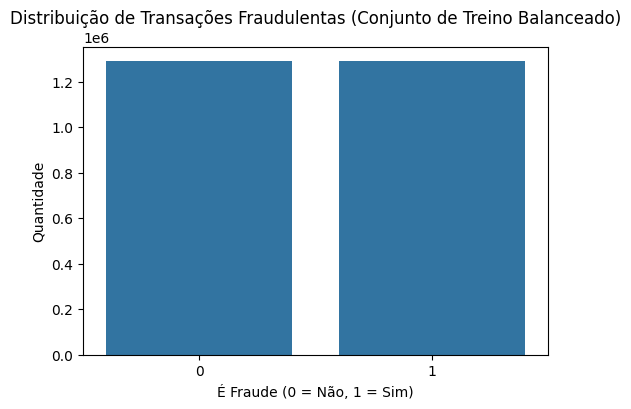

In [13]:
# Mostrar a distribuição da variável alvo no conjunto de dados balanceado
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df_resampled)
plt.title('Distribuição de Transações Fraudulentas (Conjunto de Treino Balanceado)')
plt.xlabel('É Fraude (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()